<a href="https://colab.research.google.com/github/danielgrgurevic/PortafolioDataScience/blob/main/Forecasting_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecast de ventas para tienda de productos electrónicos

###1- Resumen ejecutivo
###2- Objetivos
###3- Colección de los datos
###4- Preprocesamiento de los datos
###5- Análsis de los datos y extracción de información relevante
###6- Creación del modelo 1 y validación
###7- Búsqueda de hiperparámetros
###8- Creación del modelo 2 con parámetros ajustados manualmente
###9- Comparación de modelos y elección de modelo

## 1-Resumen Ejecutivo: Análisis y Pronóstico de Ventas en una Tienda Tecnológica

En este proyecto, se llevó a cabo un análisis exhaustivo de datos de ventas de una tienda tecnológica durante el año 2019, con el objetivo de prever las ventas futuras y optimizar la gestión de inventario. Los resultados obtenidos permiten tomar decisiones informadas para mejorar la rentabilidad y eficiencia del negocio.

Objetivos y Metodología

Predicción de Ventas para el Año 2020: Se desarrolló un modelo de pronóstico para prever las ventas de la tienda durante el año 2020. Esto permitirá gestionar el stock de productos de manera más eficiente y evitar pérdidas por falta de existencias o espacio para productos clave.

Análisis de Productos Clave: Se identificaron los productos que generaron mayores beneficios para el negocio. A través del análisis de datos, se determinó que los productos más vendidos incluyen el MacbookPro, Iphone, ThinkPad Laptop, Google Phone y Gaming Monitor, dejando ingresos por USD22.66 M, representando el 64.3% de ingresos en ventas. Además, se destacó la importancia de productos como pilas y cables debido a su alta demanda.

Resultados y Conclusiones

Tendencias y Patrones de Ventas: Se observó una tendencia positiva en las ventas a lo largo del año 2019. Los patrones estacionales mostraron aumentos significativos en ventas entre abril y mayo, así como entre noviembre y diciembre.

Modelos de Pronóstico: Se desarrollaron dos modelos de pronóstico. El primero, basado en datos predeterminados de la librería Prophet, mostró una precisión de pronóstico del 20% en un horizonte de 30 días. El segundo modelo, con ajuste de parámetros, mejoró la precisión a un 15% en un horizonte de pronóstico de 30 días. Se demostró que el modelo 2 capturó el patrón estacional del año 2019, por lo que se considera que puede modelar bien los siguientes meses del año 2020.

Recomendaciones:

Se sugiere considerar las predicciones en plazos más cortos, como 30 días, ya que el error es menor y permitirá una gestión de inventario más precisa.
Para productos clave, se recomienda desarrollar modelos específicos de pronóstico. Esto permitirá anticipar las demandas de productos individuales y evitar problemas de falta de stock.
En resumen, este proyecto brindó información valiosa sobre las tendencias y patrones de ventas en la tienda tecnológica, además de ofrecer herramientas efectivas para la toma de decisiones en la gestión de inventario y la maximización de beneficios. Las predicciones de ventas precisas y los análisis detallados de productos contribuirán a un enfoque más estratégico y rentable para el negocio.

## 2- Objetivos:
### 1- Crear modelo que pueda predecir las ventas de la tienda en el siguiente año (2020), para así poder gestionar mejor stock de productos y reducir pérdidas por falta de stock o por falta de espacio para productos clave
### 2- Realizar análisis de productos y determinar cuales dejan mayor beneficios al negocio.

## 3- Colección de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Descargas kaggle'

In [ ]:
%cd /content/gdrive/MyDrive/Descargas kaggle

/content/gdrive/MyDrive/Descargas kaggle


In [ ]:
!ls

Churn_Prediction  kaggle.json  Train_fruits  Train_life_expectancy


In [ ]:
%cd /content/gdrive/MyDrive/Descargas kaggle/Sales_forecasting

/content/gdrive/MyDrive/Descargas kaggle/Sales_forecasting


In [ ]:
!ls


Sales-forecasting.zip


In [ ]:
!unzip Sales-forecasting.zip

Archive:  Sales-forecasting.zip
  inflating: Sales_April_2019.csv    
  inflating: Sales_August_2019.csv   
  inflating: Sales_December_2019.csv  
  inflating: Sales_February_2019.csv  
  inflating: Sales_January_2019.csv  
  inflating: Sales_July_2019.csv     
  inflating: Sales_June_2019.csv     
  inflating: Sales_March_2019.csv    
  inflating: Sales_May_2019.csv      
  inflating: Sales_November_2019.csv  
  inflating: Sales_October_2019.csv  
  inflating: Sales_September_2019.csv  


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [ ]:
# Ruta de la carpeta que contiene los archivos CSV
folder_path = '/content/gdrive/MyDrive/Descargas kaggle/Sales_forecasting/'

# Lista de archivos en la carpeta
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# DataFrame vacío para almacenar los datos
all_months_data = pd.DataFrame()

# Recorre cada archivo y concatena los datos
for file in files:
    file_path = os.path.join(folder_path, file)  # Ruta completa al archivo
    data = pd.read_csv(file_path)  # Lee el archivo CSV
    all_months_data = pd.concat([all_months_data, data], ignore_index=True)  # Concatena los datos

# Exporta todos los datos a un archivo CSV
output_path = '/content/gdrive/MyDrive/Descargas kaggle/Sales_forecasting/all_data.csv'
all_months_data.to_csv(output_path, index=False)

print("Se han combinado y exportado los datos exitosamente.")


Se han combinado y exportado los datos exitosamente.


In [ ]:
%cd /content/drive/MyDrive/Descargas kaggle/Sales_forecasting

/content/drive/MyDrive/Descargas kaggle/Sales_forecasting


In [ ]:
!ls

all_data.csv		 Sales_January_2019.csv  Sales_November_2019.csv
Sales_April_2019.csv	 Sales_July_2019.csv	 Sales_October_2019.csv
Sales_August_2019.csv	 Sales_June_2019.csv	 Sales_September_2019.csv
Sales_December_2019.csv  Sales_March_2019.csv
Sales_February_2019.csv  Sales_May_2019.csv


In [ ]:
# read data
df = pd.read_csv('all_data.csv')

# show data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## 4- Preprocesamiento de los datos

In [ ]:
# getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
df.shape

(186850, 6)

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df'
columns_to_check = ['Order ID'	,'Product',	'Quantity Ordered',	'Price Each',	'Order Date',	'Purchase Address']
unique_counts = {}

# Itera a través de las columnas que deseas considerar
for column in columns_to_check:
    num_unique_values = df[column].nunique()
    unique_counts[column] = num_unique_values

unique_counts


{'Order ID': 178438,
 'Product': 20,
 'Quantity Ordered': 10,
 'Price Each': 24,
 'Order Date': 142396,
 'Purchase Address': 140788}

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [ ]:
unique_values = df['Quantity Ordered'].unique()
unique_values

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [ ]:
# Filtrar los valores numéricos y eliminar la cadena 'Quantity Ordered'
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

In [ ]:
unique_values = df['Quantity Ordered'].unique()
unique_values

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [ ]:
df.shape

(185950, 6)

In [ ]:
# convert the data
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')

In [ ]:
df['Quantity Ordered'].info()

<class 'pandas.core.series.Series'>
Int64Index: 185950 entries, 0 to 186849
Series name: Quantity Ordered
Non-Null Count   Dtype
--------------   -----
185950 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB


In [ ]:
df['Price Each']=df['Price Each'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [ ]:
# convert it using to_datetime() funct
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles


In [ ]:
df = df.drop('Purchase Address', axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles


In [ ]:
df = df.sort_values(by='Order Date')

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,New York City
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,San Francisco
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,New York City
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,Dallas
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,Atlanta


In [ ]:
# Delete the index column
df.reset_index(drop=True, inplace=True)
# Reorder columns
df = df[['Order Date','Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'City']]
df.head(20)

,Order Date,Order ID,Product,Quantity Ordered,Price Each,City
0,2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,New York City
1,2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,San Francisco
2,2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,New York City
3,2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,Dallas
4,2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,Atlanta
5,2019-01-01 06:13:00,141732,iPhone,1,700.00,Atlanta
6,2019-01-01 06:34:00,149620,Lightning Charging Cable,1,14.95,San Francisco
7,2019-01-01 06:41:00,142451,AAA Batteries (4-pack),1,2.99,Boston
8,2019-01-01 07:24:00,146039,34in Ultrawide Monitor,1,379.99,San Francisco
9,2019-01-01 07:26:00,143498,AA Batteries (4-pack),3,3.84,New York City


## 5- Análsis de los datos y extracción de información relevante

In [ ]:
most_selled_products= df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
most_selled_products = most_selled_products.reset_index()
most_selled_products

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


In [ ]:
# Crear el gráfico de barras verticales con Plotly Express
fig = px.bar(most_selled_products, x='Product', y='Quantity Ordered', title='Productos Más Vendidos')
fig

In [ ]:
# Calcular los ingresos por producto
df['Total Revenue'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,City,Total Revenue
0,2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,New York City,11.99
1,2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,San Francisco,11.95
2,2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,New York City,150.00
3,2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,Dallas,2.99
4,2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,Atlanta,23.90


In [ ]:
productos_mas_ingresos = df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False)
productos_mas_ingresos_df = productos_mas_ingresos.reset_index()
productos_mas_ingresos_df

,Product,Total Revenue
0,Macbook Pro Laptop,8037600.00
1,iPhone,4794300.00
2,ThinkPad Laptop,4129958.70
3,Google Phone,3319200.00
4,27in 4K Gaming Monitor,2435097.56
5,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
7,Flatscreen TV,1445700.00
8,Bose SoundSport Headphones,1345565.43
9,27in FHD Monitor,1132424.50


In [ ]:
# Crear el gráfico de barras verticales con Plotly Express
fig = px.bar(productos_mas_ingresos_df, x='Product', y='Total Revenue', title='Productos con Más Ingresos')
fig

In [ ]:
product_prices = df.groupby('Product')['Price Each'].first().reset_index()
product_prices.rename(columns={'Price': 'Price Each'}, inplace=True)
product_prices = product_prices.sort_values(by='Price Each', ascending=False)
product_prices


,Product,Price Each
13,Macbook Pro Laptop,1700.00
14,ThinkPad Laptop,999.99
18,iPhone,700.00
10,LG Dryer,600.00
11,LG Washing Machine,600.00
9,Google Phone,600.00
16,Vareebadd Phone,400.00
1,27in 4K Gaming Monitor,389.99
3,34in Ultrawide Monitor,379.99
8,Flatscreen TV,300.00


In [ ]:
# Crear el gráfico de distribución de precios unitarios con Plotly Express
fig = px.histogram(product_prices, x='Product', y='Price Each', title='Distribución de Precios Unitarios')
fig.update_layout(xaxis_title='Producto', yaxis_title='Precio Unitario')

In [ ]:
df_revenue = df[['Order Date', 'Quantity Ordered', 'Price Each']]
df_revenue.head()

,Order Date,Quantity Ordered,Price Each
0,2019-01-01 03:07:00,1,11.99
1,2019-01-01 03:40:00,1,11.95
2,2019-01-01 04:56:00,1,150.00
3,2019-01-01 05:53:00,1,2.99
4,2019-01-01 06:03:00,2,11.95


In [ ]:
df.head()

,Order Date,Order ID,Product,Quantity Ordered,Price Each,City,Total Revenue
0,2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,New York City,11.99
1,2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,San Francisco,11.95
2,2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,New York City,150.00
3,2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,Dallas,2.99
4,2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,Atlanta,23.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Date        185950 non-null  datetime64[ns]
 1   Order ID          185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   City              185950 non-null  object        
 6   Total Revenue     185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
df.drop([	'Order ID',	'Product','Quantity Ordered','Price Each','City'],axis=1,inplace=True)



In [ ]:
df.columns=['ds','y']
df.head()

,ds,y
0,2019-01-01 03:07:00,11.99
1,2019-01-01 03:40:00,11.95
2,2019-01-01 04:56:00,150.00
3,2019-01-01 05:53:00,2.99
4,2019-01-01 06:03:00,23.90


In [ ]:
df = df.resample('D', on='ds').sum().reset_index()
df.head()

,ds,y
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63


In [ ]:
df.shape

(366, 2)

In [ ]:
!ls

all_data.csv		    Sales_February_2019.csv  Sales_May_2019.csv
data_sales_forecasting.csv  Sales_January_2019.csv   Sales_November_2019.csv
Sales_April_2019.csv	    Sales_July_2019.csv      Sales_October_2019.csv
Sales_August_2019.csv	    Sales_June_2019.csv      Sales_September_2019.csv
Sales_December_2019.csv     Sales_March_2019.csv


In [ ]:
df.to_csv('data_sales_forecasting.csv', index=False)

NameError: ignored

In [ ]:
df.to_csv('daily_data_ds_y.csv', index=False)

## 6- Construcción del modelo 1 de referencia
### Carga de dataframe para predicción

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.express as px

In [ ]:
%cd /content/drive/MyDrive/Descargas kaggle/Sales_forecasting

/content/drive/MyDrive/Descargas kaggle/Sales_forecasting


In [ ]:
df = pd.read_csv('daily_data_ds_y.csv', index_col=None, parse_dates=['ds'])

In [ ]:
df= df.resample('D', on='ds').sum()

# Restablece el índice
df = df.reset_index()

#Eliminar ceros
df = df[df['y'] != 0]
# Eliminar la fila con la fecha "2020-01-01"
date_to_remove = "2020-01-01"
df = df[df['ds'] != date_to_remove]
# Mostrar la cola del DF
df.tail(100)

,ds,y
265,2019-09-23,70232.03
266,2019-09-24,66751.42
267,2019-09-25,78245.17
268,2019-09-26,79307.77
269,2019-09-27,66331.18
...,...,...
360,2019-12-27,126628.05
361,2019-12-28,134015.50
362,2019-12-29,156024.62
363,2019-12-30,152319.81


In [ ]:
import plotly.express as px
# Crea el scatter plot interactivo con Plotly
fig = px.scatter(df, x='ds', y='y', title='Scatter Plot de Ventas',
                 labels={'ds': 'Fecha y Hora', 'y': 'Ventas'})

# Muestra el scatter plot interactivo
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      365 non-null    datetime64[ns]
 1   y       365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [ ]:
df.shape

(365, 2)

### 2-Entrenamiento del modelo de predicción con parámetros predeterminados

In [ ]:
# Crear modelo de referencia con hiperparámetros predeterminados de Prophet
# Por defecto: changepoint_prior_scale:  0.05 y seasonality_prior_scale: 10.0.
# Se define un objeto prophet
model1 = Prophet()
# Se ajusta el modelo al dataframe df
model1.fit(df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/geyttdmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kfeyrkxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2065', 'data', 'file=/tmp/tmpvau85b_6/geyttdmw.json', 'init=/tmp/tmpvau85b_6/kfeyrkxp.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model4cp6ju7u/prophet_model-20230818145615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecast Away

In [ ]:
future1 = model1.make_future_dataframe(periods=365)
future1.tail()

,ds
725,2020-12-26
726,2020-12-27
727,2020-12-28
728,2020-12-29
729,2020-12-30


In [ ]:
fcst1 = model1.predict(future1)
fcst1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
725,2020-12-26,379173.845593,254176.538911,511200.530492
726,2020-12-27,380085.370045,257285.978981,512675.326488
727,2020-12-28,379522.885022,252426.436416,513401.370973
728,2020-12-29,382718.651472,260562.099941,521902.909373
729,2020-12-30,383940.264800,254820.237219,519683.537528


En el siguiente gráfico de predicción del modelo1 a 365 días se puede ver una alta incertidumbre, y una baja captación de patrones de estacionalidad, ya que la línea de tendencia sigue un patrón lineal ascendente

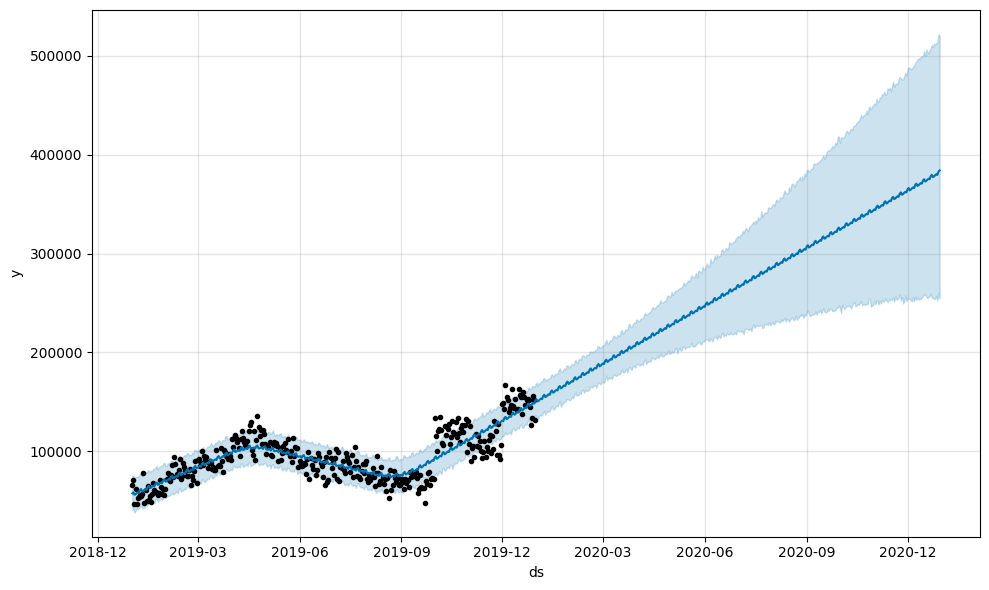

In [ ]:
fig1 = model1.plot(fcst1)

A continuación se muestra la tendencia anual y la estacionalidad semanal

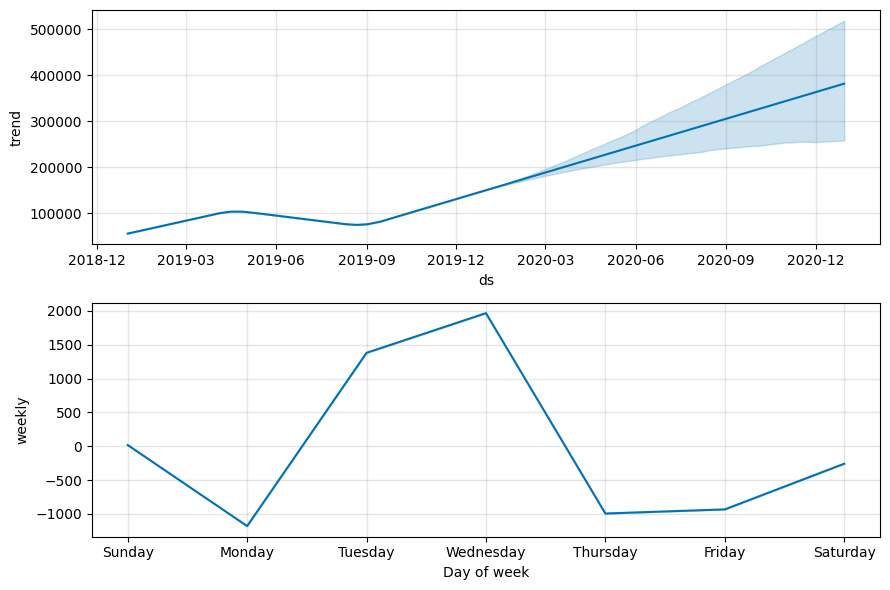

In [ ]:
fig = model1.plot_components(fcst1)

In [ ]:
from prophet.plot import add_changepoints_to_plot

Se identifican dos puntos de cambios, el primero en abril, el cúal cambia a una tendencia descendente, luego en septiembre se percibe el segundo punto de cambio dando un giro hacia una tendencia ascendente

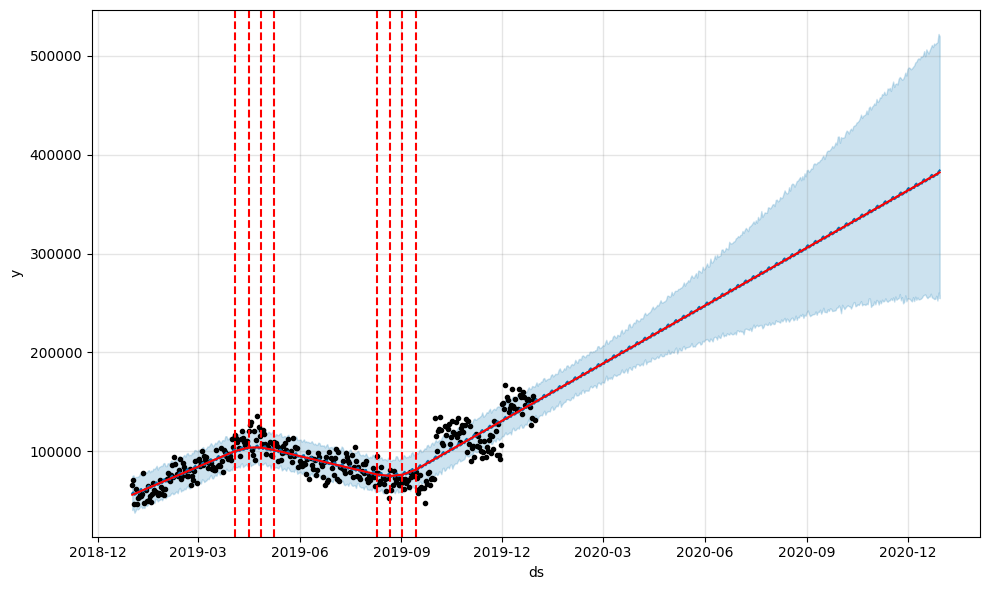

In [ ]:
fig = model1.plot(fcst1)
a = add_changepoints_to_plot(fig.gca(), model1, fcst1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/opz8e_1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ixnr_lv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95685', 'data', 'file=/tmp/tmpvau85b_6/opz8e_1b.json', 'init=/tmp/tmpvau85b_6/ixnr_lv2.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeldw73w3iy/prophet_model-20230818150805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


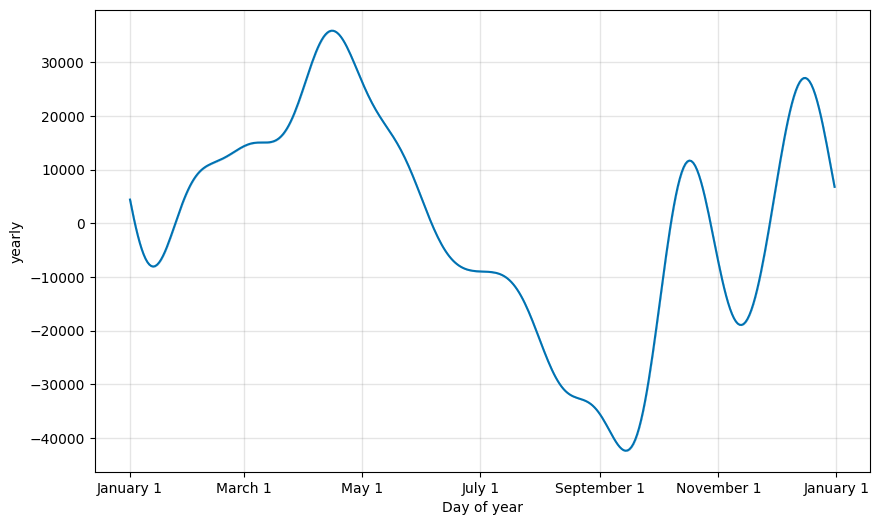

In [ ]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=10).fit(df)
a = plot_yearly(m)

### 6.2- Diagnóstico del Modelo: Validación cruzada

In [ ]:
from prophet.diagnostics import cross_validation
df_cv1 = cross_validation(model1, initial='100 days', period='30 days', horizon = '30days')

INFO:prophet:Making 8 forecasts with cutoffs between 2019-05-05 00:00:00 and 2019-12-01 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3tbs_71b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ejsrk5pt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34727', 'data', 'file=/tmp/tmpvau85b_6/3tbs_71b.json', 'init=/tmp/tmpvau85b_6/ejsrk5pt.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model5rkfbsl1/prophet_model-20230818150846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ghr8zety.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0lpf6s0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-05-06,117777.666190,107143.405435,128697.200058,96172.39,2019-05-05
1,2019-05-07,122332.998791,110872.427250,133500.870917,94958.09,2019-05-05
2,2019-05-08,124208.588445,112340.919386,135643.889718,107953.46,2019-05-05
3,2019-05-09,119330.535077,107932.017017,130976.775822,109371.00,2019-05-05
4,2019-05-10,123543.137156,111573.947321,134784.832221,106879.76,2019-05-05


In [ ]:
from prophet.diagnostics import performance_metrics
df_p1 = performance_metrics(df_cv1, rolling_window=1)

In [ ]:
df_p1.head

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,7.646102e+08,27651.585259,20747.041501,0.19802,0.153578,0.210473,0.425


El error porcentual absoluto medio es de 19.8% lo que significa que las predicciones están un 19.8%, por debajo de los valores reales.

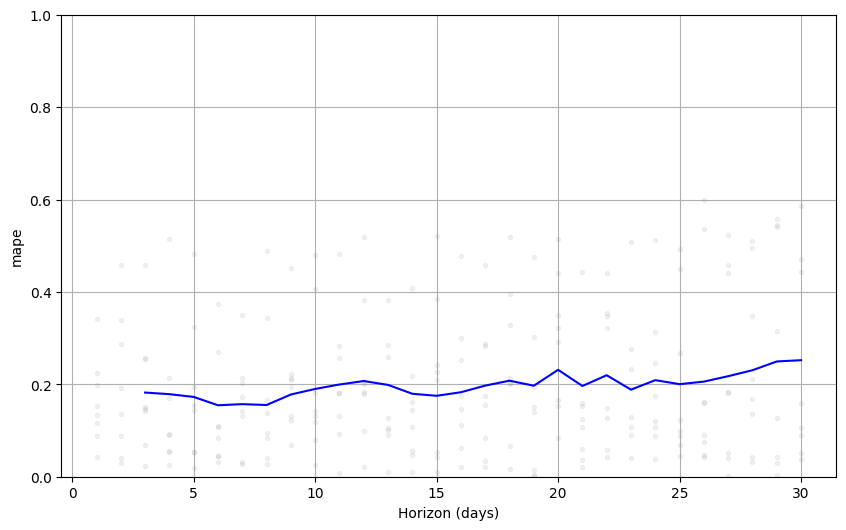

In [ ]:
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

# Con el DataFrame df_cv1 de los resultados de cross-validation
fig_cv1 = plot_cross_validation_metric(df_cv1, metric='mape')

# Ajustar el rango del eje y para que llegue hasta 100
plt.ylim(0, 1)

# Mostrar el gráfico
plt.show()

## 7- Ajuste de Hiperparámetros

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.08,0.1,0.3,0.5],
    'seasonality_prior_scale': [0.01, 0.1,0.5, 1.0, 2,5,10],
    'seasonality_mode':['additive','multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    # Agregar estacionalidad anual fija (periodo de 365 días)
    m.add_seasonality(name='yearly', period=365, fourier_order=10)

    m=m.fit(df)  # Fit model with given params
    df_cv = cross_validation(m, initial='100 days', period='30 days', horizon = '30days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])  # Almacena el MAPE

# Resultados del mejoramiento
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
# Encontrar la mejor combinación de parámetros
best_params=all_params[np.argmin(mapes)]
print(best_params)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bnaz2dmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ut09elee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98470', 'data', 'file=/tmp/tmpvau85b_6/bnaz2dmr.json', 'init=/tmp/tmpvau85b_6/ut09elee.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelskevy4r9/prophet_model-20230818161930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 8 forecasts with cutoffs be

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ds605kho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3de_ejc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81368', 'data', 'file=/tmp/tmpvau85b_6/ds605kho.json', 'init=/tmp/tmpvau85b_6/3de_ejc8.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model7nwl8iqz/prophet_model-20230818161931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:19:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/471dqbnn.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3z5dsvxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/gyqocqgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73899', 'data', 'file=/tmp/tmpvau85b_6/3z5dsvxy.json', 'init=/tmp/tmpvau85b_6/gyqocqgw.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model85rc84da/prophet_model-20230818161939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:19:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/w40wpej7.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/5pn2iks0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/l970sfql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65193', 'data', 'file=/tmp/tmpvau85b_6/5pn2iks0.json', 'init=/tmp/tmpvau85b_6/l970sfql.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model1r05z2gf/prophet_model-20230818161944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:19:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/o0co4co1.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/8lh0x0gx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/k87gjz5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77153', 'data', 'file=/tmp/tmpvau85b_6/8lh0x0gx.json', 'init=/tmp/tmpvau85b_6/k87gjz5b.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelh96clqsg/prophet_model-20230818161956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:19:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2ot5z6bj.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3saeuxv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rlkeg9dj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82620', 'data', 'file=/tmp/tmpvau85b_6/3saeuxv4.json', 'init=/tmp/tmpvau85b_6/rlkeg9dj.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelklqgia3j/prophet_model-20230818162013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:20:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/u0cap0qb.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0b28oxjl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hhyexvlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39065', 'data', 'file=/tmp/tmpvau85b_6/0b28oxjl.json', 'init=/tmp/tmpvau85b_6/hhyexvlk.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelwn6aglga/prophet_model-20230818162019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:20:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3f9yfdzu.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/swqww1xe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_i8locyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59452', 'data', 'file=/tmp/tmpvau85b_6/swqww1xe.json', 'init=/tmp/tmpvau85b_6/_i8locyw.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modela_gm13bu/prophet_model-20230818162046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:20:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/u9xgrgrb.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/dp9yfxvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ueyp9gxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73531', 'data', 'file=/tmp/tmpvau85b_6/dp9yfxvb.json', 'init=/tmp/tmpvau85b_6/ueyp9gxt.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model8yeuziqs/prophet_model-20230818162059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:20:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hbozj5hy.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/tpfqxr55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j1qpa4xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41659', 'data', 'file=/tmp/tmpvau85b_6/tpfqxr55.json', 'init=/tmp/tmpvau85b_6/j1qpa4xp.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelemwme___/prophet_model-20230818162229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:22:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/zxyiacfn.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/slvz9cxr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hx594pvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32668', 'data', 'file=/tmp/tmpvau85b_6/slvz9cxr.json', 'init=/tmp/tmpvau85b_6/hx594pvj.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelhnfgvox8/prophet_model-20230818162239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:22:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/mwt_panq.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6v0t66gt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/f7n8sccm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10637', 'data', 'file=/tmp/tmpvau85b_6/6v0t66gt.json', 'init=/tmp/tmpvau85b_6/f7n8sccm.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelx5kkg8lk/prophet_model-20230818162310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:23:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/havhaimx.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/y3tt4w5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2roudswh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27353', 'data', 'file=/tmp/tmpvau85b_6/y3tt4w5z.json', 'init=/tmp/tmpvau85b_6/2roudswh.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeljzuwt77p/prophet_model-20230818162316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:23:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/t6p5mb9f.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/gmqikqby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/euf6ym76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96717', 'data', 'file=/tmp/tmpvau85b_6/gmqikqby.json', 'init=/tmp/tmpvau85b_6/euf6ym76.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model5te0oens/prophet_model-20230818162342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:23:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/sxsj9h30.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/m78pa2x4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/wbcu922v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76878', 'data', 'file=/tmp/tmpvau85b_6/m78pa2x4.json', 'init=/tmp/tmpvau85b_6/wbcu922v.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelsfsu5g78/prophet_model-20230818162355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:23:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nqjf_tww.json
DE

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/mbykhmn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/urc9wd31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36115', 'data', 'file=/tmp/tmpvau85b_6/mbykhmn_.json', 'init=/tmp/tmpvau85b_6/urc9wd31.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelh2igjb78/prophet_model-20230818162419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/vp9iun2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_peooeps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2zd20ia4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j4ooae6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69375', 'data', 'file=/tmp/tmpvau85b_6/2zd20ia4.json', 'init=/tmp/tmpvau85b_6/j4ooae6w.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model20d43p8s/prophet_model-20230818162421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/laoq59zp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/etyy2zx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/no54qwbq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/itz5_qze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9222', 'data', 'file=/tmp/tmpvau85b_6/no54qwbq.json', 'init=/tmp/tmpvau85b_6/itz5_qze.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelk2cyefxu/prophet_model-20230818162422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3t7oz10t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xovanma7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/sig4o3ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2jhn21xz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24274', 'data', 'file=/tmp/tmpvau85b_6/sig4o3ex.json', 'init=/tmp/tmpvau85b_6/2jhn21xz.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelulpu223v/prophet_model-20230818162424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/af1hfus6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hi65vtlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bacsyl1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/4e5b1zo3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7677', 'data', 'file=/tmp/tmpvau85b_6/bacsyl1v.json', 'init=/tmp/tmpvau85b_6/4e5b1zo3.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model327c91fv/prophet_model-20230818162426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/m4fann92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/f0m8pxok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/i2kkueen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j85v43i4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35780', 'data', 'file=/tmp/tmpvau85b_6/i2kkueen.json', 'init=/tmp/tmpvau85b_6/j85v43i4.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_models62onyk_/prophet_model-20230818162428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7_iwdlsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j39v0kl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0pxusmoc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/80h_8ztq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83324', 'data', 'file=/tmp/tmpvau85b_6/0pxusmoc.json', 'init=/tmp/tmpvau85b_6/80h_8ztq.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model2w9ed4m4/prophet_model-20230818162430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ygn_ad3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/f9cndupj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0sfd89ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7x5bmdlw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96752', 'data', 'file=/tmp/tmpvau85b_6/0sfd89ey.json', 'init=/tmp/tmpvau85b_6/7x5bmdlw.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelty55u30x/prophet_model-20230818162433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1i5vk504.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/uud8ee8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_vivxhs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/qi5g3hyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29518', 'data', 'file=/tmp/tmpvau85b_6/_vivxhs1.json', 'init=/tmp/tmpvau85b_6/qi5g3hyj.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelfk6cn_3g/prophet_model-20230818162435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jan43fn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xilukdjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/33ikg985.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/gars2y__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11394', 'data', 'file=/tmp/tmpvau85b_6/33ikg985.json', 'init=/tmp/tmpvau85b_6/gars2y__.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelz4x5mbvm/prophet_model-20230818162436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/utxuihqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/wcble7wn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/big5wkg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/f32qy3e0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73695', 'data', 'file=/tmp/tmpvau85b_6/big5wkg8.json', 'init=/tmp/tmpvau85b_6/f32qy3e0.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelopr8de53/prophet_model-20230818162438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2q4tuqg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/w3ad7pnl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7v5o25pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1e1eoshy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78238', 'data', 'file=/tmp/tmpvau85b_6/7v5o25pu.json', 'init=/tmp/tmpvau85b_6/1e1eoshy.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelnigyvx1w/prophet_model-20230818162440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yzgo3zd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/5tn7xzsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/lqik1nxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_6nyviu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18043', 'data', 'file=/tmp/tmpvau85b_6/lqik1nxg.json', 'init=/tmp/tmpvau85b_6/_6nyviu4.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeltbq6c1oo/prophet_model-20230818162442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yu37ierk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2c2q_ds4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/h_r262i3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/dpndhsz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26463', 'data', 'file=/tmp/tmpvau85b_6/h_r262i3.json', 'init=/tmp/tmpvau85b_6/dpndhsz7.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelomdl9b3h/prophet_model-20230818162444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/pen_cwpe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3gco3e97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/zsiifkgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hhr7fw5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78335', 'data', 'file=/tmp/tmpvau85b_6/zsiifkgj.json', 'init=/tmp/tmpvau85b_6/hhr7fw5h.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelws35zw_3/prophet_model-20230818162446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/d_njx4p_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s4a_rrgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/modlx_cl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/66nm9r4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18313', 'data', 'file=/tmp/tmpvau85b_6/modlx_cl.json', 'init=/tmp/tmpvau85b_6/66nm9r4t.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelac9082e0/prophet_model-20230818162449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/q_wjxozv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7ctdauba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/v8pth59l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/qjbw9duy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85332', 'data', 'file=/tmp/tmpvau85b_6/v8pth59l.json', 'init=/tmp/tmpvau85b_6/qjbw9duy.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeli2nnlm03/prophet_model-20230818162452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_5i6ln9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/dnqo1wfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nqfo6ici.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/b4mkhl39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17367', 'data', 'file=/tmp/tmpvau85b_6/nqfo6ici.json', 'init=/tmp/tmpvau85b_6/b4mkhl39.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelyb399r04/prophet_model-20230818162454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/shp_egck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/epmwy16g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/wvmsl2lw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9nm8fz7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37093', 'data', 'file=/tmp/tmpvau85b_6/wvmsl2lw.json', 'init=/tmp/tmpvau85b_6/9nm8fz7_.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelyji3mzh0/prophet_model-20230818162455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/onm8k7kz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/cpw_ta58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j0p902j9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6lct8w8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69476', 'data', 'file=/tmp/tmpvau85b_6/j0p902j9.json', 'init=/tmp/tmpvau85b_6/6lct8w8_.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelnw7y3kyq/prophet_model-20230818162457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/c3grdnsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3wxwa7fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/a56snqni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j9ionz9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19068', 'data', 'file=/tmp/tmpvau85b_6/a56snqni.json', 'init=/tmp/tmpvau85b_6/j9ionz9t.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelilxc7qnw/prophet_model-20230818162459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rfhouh1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nijnp74o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/uhwncri8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kr79z_8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6243', 'data', 'file=/tmp/tmpvau85b_6/uhwncri8.json', 'init=/tmp/tmpvau85b_6/kr79z_8v.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model6y3zy0rn/prophet_model-20230818162501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ji98rs8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6ht66b39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_ecgmeng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/taccqi73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69811', 'data', 'file=/tmp/tmpvau85b_6/_ecgmeng.json', 'init=/tmp/tmpvau85b_6/taccqi73.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelk1cs35xo/prophet_model-20230818162504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2xk5wb6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/5f0mz_fc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/t9xtvy1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/qgslz5tc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11877', 'data', 'file=/tmp/tmpvau85b_6/t9xtvy1d.json', 'init=/tmp/tmpvau85b_6/qgslz5tc.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modela0qxuwgl/prophet_model-20230818162506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/77eg8uar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/egmh9x3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/irh21qam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hvevpdge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54065', 'data', 'file=/tmp/tmpvau85b_6/irh21qam.json', 'init=/tmp/tmpvau85b_6/hvevpdge.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelvu00fs2s/prophet_model-20230818162509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/k6qwg9bl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/c9s83e3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s0h5ckkz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ixw091br.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82264', 'data', 'file=/tmp/tmpvau85b_6/s0h5ckkz.json', 'init=/tmp/tmpvau85b_6/ixw091br.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeleqnoy7vn/prophet_model-20230818162511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/cyv1a512.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/z0dfx983.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ld09ewnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/o4849dp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34413', 'data', 'file=/tmp/tmpvau85b_6/ld09ewnw.json', 'init=/tmp/tmpvau85b_6/o4849dp0.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model8423dz9w/prophet_model-20230818162513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/izaafsob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xto5plax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/a9ipw5mj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/q1wwpnsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9629', 'data', 'file=/tmp/tmpvau85b_6/a9ipw5mj.json', 'init=/tmp/tmpvau85b_6/q1wwpnsc.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model6gcf4fhm/prophet_model-20230818162515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ri9qqdqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ayy8wyc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/56luaaf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nuebdquw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54649', 'data', 'file=/tmp/tmpvau85b_6/56luaaf2.json', 'init=/tmp/tmpvau85b_6/nuebdquw.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model01dtfx9_/prophet_model-20230818162517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rlai_6hq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/snjgzy8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rm117ip_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kql2tah2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44207', 'data', 'file=/tmp/tmpvau85b_6/rm117ip_.json', 'init=/tmp/tmpvau85b_6/kql2tah2.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model3xfmvxqm/prophet_model-20230818162519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/adyk_am8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/n7m2k5pi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/v6eke7sc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nygxbrnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45765', 'data', 'file=/tmp/tmpvau85b_6/v6eke7sc.json', 'init=/tmp/tmpvau85b_6/nygxbrnu.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modele1sftav1/prophet_model-20230818162522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/wur5m0xq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/h4x60f3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/r37xnjon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/96dmol93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72389', 'data', 'file=/tmp/tmpvau85b_6/r37xnjon.json', 'init=/tmp/tmpvau85b_6/96dmol93.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelxss95agq/prophet_model-20230818162525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jfapjmyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jj5ofxuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kkb8_9cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/4810fzb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54562', 'data', 'file=/tmp/tmpvau85b_6/kkb8_9cj.json', 'init=/tmp/tmpvau85b_6/4810fzb2.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modele_fzur9l/prophet_model-20230818162527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/lvhnvju4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fy4wl9dm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/dn42f592.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/qkgr3639.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31419', 'data', 'file=/tmp/tmpvau85b_6/dn42f592.json', 'init=/tmp/tmpvau85b_6/qkgr3639.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelmbuzanuu/prophet_model-20230818162529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nxoa036v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nk_3fuhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/df8gwpfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kl6t90q8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11223', 'data', 'file=/tmp/tmpvau85b_6/df8gwpfj.json', 'init=/tmp/tmpvau85b_6/kl6t90q8.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model9_3g8luz/prophet_model-20230818162531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/5s4czzw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/qqyxjdse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0la2y_rr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7dmtp_fi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12983', 'data', 'file=/tmp/tmpvau85b_6/0la2y_rr.json', 'init=/tmp/tmpvau85b_6/7dmtp_fi.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelx886bwi2/prophet_model-20230818162533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rbyr641z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fr_i66xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/95_urvwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/o3kfubg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57426', 'data', 'file=/tmp/tmpvau85b_6/95_urvwm.json', 'init=/tmp/tmpvau85b_6/o3kfubg_.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelepq03rj2/prophet_model-20230818162535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0kx3ngd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0vudvaxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bcem1wkr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hl0v6g6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59033', 'data', 'file=/tmp/tmpvau85b_6/bcem1wkr.json', 'init=/tmp/tmpvau85b_6/hl0v6g6h.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelskw50px4/prophet_model-20230818162537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9mqypzya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s7m5b24j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/zgmfwkp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/tjzzkg13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73390', 'data', 'file=/tmp/tmpvau85b_6/zgmfwkp1.json', 'init=/tmp/tmpvau85b_6/tjzzkg13.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model7lmw9riw/prophet_model-20230818162540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/35dqhfpk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/b7e_32cs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/k3_cmb7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/x2xy4ujw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75174', 'data', 'file=/tmp/tmpvau85b_6/k3_cmb7l.json', 'init=/tmp/tmpvau85b_6/x2xy4ujw.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_models0hf6jz9/prophet_model-20230818162542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bjsbtpar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9gbwqwt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ls4mprks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yiw8w23b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32238', 'data', 'file=/tmp/tmpvau85b_6/ls4mprks.json', 'init=/tmp/tmpvau85b_6/yiw8w23b.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeli_5mub4l/prophet_model-20230818162545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6dbopw7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/m4qox20r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rlkyiros.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/naegvs76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90228', 'data', 'file=/tmp/tmpvau85b_6/rlkyiros.json', 'init=/tmp/tmpvau85b_6/naegvs76.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelu1ro74k8/prophet_model-20230818162547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/uu9zr15o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/o9jzzdvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xtkt96gr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3zm_5yg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77587', 'data', 'file=/tmp/tmpvau85b_6/xtkt96gr.json', 'init=/tmp/tmpvau85b_6/3zm_5yg7.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeld6fg6ypm/prophet_model-20230818162549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/d835yufz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ugwrqdvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1hezdssa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yeh8e42o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58005', 'data', 'file=/tmp/tmpvau85b_6/1hezdssa.json', 'init=/tmp/tmpvau85b_6/yeh8e42o.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeln2dbicts/prophet_model-20230818162552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/pwh91ykj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/psiiz1s_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0v8jy79c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_rftuo9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83631', 'data', 'file=/tmp/tmpvau85b_6/0v8jy79c.json', 'init=/tmp/tmpvau85b_6/_rftuo9z.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model2gkbi9vk/prophet_model-20230818162554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0ort44cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7lfa52rd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/pfri4iqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/frllbrpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3750', 'data', 'file=/tmp/tmpvau85b_6/pfri4iqx.json', 'init=/tmp/tmpvau85b_6/frllbrpu.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelnjebbc_6/prophet_model-20230818162556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/iipra4l1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/k3lqfmvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/lsx5c4fk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j8kbne8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41164', 'data', 'file=/tmp/tmpvau85b_6/lsx5c4fk.json', 'init=/tmp/tmpvau85b_6/j8kbne8j.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelhwurja14/prophet_model-20230818162559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/apvtij9r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3inexu4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ibgns15w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/h_jj2ns8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34842', 'data', 'file=/tmp/tmpvau85b_6/ibgns15w.json', 'init=/tmp/tmpvau85b_6/h_jj2ns8.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model44wlhqrg/prophet_model-20230818162601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rv5_9_py.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/mbs99z1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/vvfl_exl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s35g_cmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71920', 'data', 'file=/tmp/tmpvau85b_6/vvfl_exl.json', 'init=/tmp/tmpvau85b_6/s35g_cmr.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modell4a3zjvf/prophet_model-20230818162604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ohj1mns1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/vv757z7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fvwvf6nf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/87lwly05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68766', 'data', 'file=/tmp/tmpvau85b_6/fvwvf6nf.json', 'init=/tmp/tmpvau85b_6/87lwly05.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modela7pv3vkf/prophet_model-20230818162606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nmdtf6wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/stp04kh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/d_31yx7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/lybqwkii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17299', 'data', 'file=/tmp/tmpvau85b_6/d_31yx7z.json', 'init=/tmp/tmpvau85b_6/lybqwkii.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelrc_gl42v/prophet_model-20230818162608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/meuyg7uw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/pkhxcnuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_bdxobf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jt3biyg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47562', 'data', 'file=/tmp/tmpvau85b_6/_bdxobf4.json', 'init=/tmp/tmpvau85b_6/jt3biyg8.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelw45w9jbk/prophet_model-20230818162610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/gqsmy1c9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7_23hcw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ul_gtpmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xba5tx6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92823', 'data', 'file=/tmp/tmpvau85b_6/ul_gtpmf.json', 'init=/tmp/tmpvau85b_6/xba5tx6c.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeld6lt3ups/prophet_model-20230818162613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jszxg0ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/t_n9eq85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9mzycnk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_6ivqmb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98155', 'data', 'file=/tmp/tmpvau85b_6/9mzycnk6.json', 'init=/tmp/tmpvau85b_6/_6ivqmb9.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelnkvh0avp/prophet_model-20230818162615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ynvrz55p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/faqk5oha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/8_7h2lah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/u18fzkew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83648', 'data', 'file=/tmp/tmpvau85b_6/8_7h2lah.json', 'init=/tmp/tmpvau85b_6/u18fzkew.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelznskp_cq/prophet_model-20230818162617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/p6qt4rap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/v01_uwya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/30lxkb9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/76ymyts5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85874', 'data', 'file=/tmp/tmpvau85b_6/30lxkb9d.json', 'init=/tmp/tmpvau85b_6/76ymyts5.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelxj16uc1b/prophet_model-20230818162620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yrb1uu6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/g0vnj0fv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7srhx3nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/w1_miwq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24726', 'data', 'file=/tmp/tmpvau85b_6/7srhx3nl.json', 'init=/tmp/tmpvau85b_6/w1_miwq_.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model5osnvrbr/prophet_model-20230818162622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0m8yu4l4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/oxhbinen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/q8oiickv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/74oeqrjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31269', 'data', 'file=/tmp/tmpvau85b_6/q8oiickv.json', 'init=/tmp/tmpvau85b_6/74oeqrjj.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modellff1qqbc/prophet_model-20230818162625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/irf6oaqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6oor0weq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/v65ohrsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ts_8qbli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49305', 'data', 'file=/tmp/tmpvau85b_6/v65ohrsa.json', 'init=/tmp/tmpvau85b_6/ts_8qbli.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modele744u4ej/prophet_model-20230818162627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/8918d3fh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1g4sw84h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ah7zb1ch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hxwh1rdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16310', 'data', 'file=/tmp/tmpvau85b_6/ah7zb1ch.json', 'init=/tmp/tmpvau85b_6/hxwh1rdl.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelzqhfdm5_/prophet_model-20230818162629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2kni0tz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/5lxderhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fwtu5m2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/diog1hee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45753', 'data', 'file=/tmp/tmpvau85b_6/fwtu5m2v.json', 'init=/tmp/tmpvau85b_6/diog1hee.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelz1axp447/prophet_model-20230818162632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/joj0ptnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j2qcrv14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/f4miqb5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3forv74v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39125', 'data', 'file=/tmp/tmpvau85b_6/f4miqb5g.json', 'init=/tmp/tmpvau85b_6/3forv74v.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelw8j9u3ud/prophet_model-20230818162634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/gro4ywv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/75rx8wow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s5ivhytf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/22h94hro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27986', 'data', 'file=/tmp/tmpvau85b_6/s5ivhytf.json', 'init=/tmp/tmpvau85b_6/22h94hro.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_models8k711c_/prophet_model-20230818162637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/357jz29h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yfrj9xel.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/f4pxzw6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/l1vucb8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49199', 'data', 'file=/tmp/tmpvau85b_6/f4pxzw6i.json', 'init=/tmp/tmpvau85b_6/l1vucb8l.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelxr178jlv/prophet_model-20230818162639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kxejwbra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nkbgsx_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/pscn8iys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bnzoh2vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19785', 'data', 'file=/tmp/tmpvau85b_6/pscn8iys.json', 'init=/tmp/tmpvau85b_6/bnzoh2vn.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelk0md5sm8/prophet_model-20230818162642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/7t_ho88d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rx_lt6j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6q7rzbwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/i42gu5b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29085', 'data', 'file=/tmp/tmpvau85b_6/6q7rzbwq.json', 'init=/tmp/tmpvau85b_6/i42gu5b3.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model7y_egae2/prophet_model-20230818162644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/upajtbjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9435z8b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/05n5knjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jury76xa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11271', 'data', 'file=/tmp/tmpvau85b_6/05n5knjf.json', 'init=/tmp/tmpvau85b_6/jury76xa.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeli5we5ga7/prophet_model-20230818162647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s6939xa0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nn31bobd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/__gva9dx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/kecj7hgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76695', 'data', 'file=/tmp/tmpvau85b_6/__gva9dx.json', 'init=/tmp/tmpvau85b_6/kecj7hgt.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelot81xt29/prophet_model-20230818162649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3i0xlnp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ppv5ck5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1quh_b0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/uly13foe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50514', 'data', 'file=/tmp/tmpvau85b_6/1quh_b0n.json', 'init=/tmp/tmpvau85b_6/uly13foe.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelyfk6e_bz/prophet_model-20230818162652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/wd3715rv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/q3m388qc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/c1vbkf67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3t39f7fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89089', 'data', 'file=/tmp/tmpvau85b_6/c1vbkf67.json', 'init=/tmp/tmpvau85b_6/3t39f7fr.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelqo6z1_z2/prophet_model-20230818162655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/r55u09dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/8d8nzi5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2s3w31am.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hv1llq5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97314', 'data', 'file=/tmp/tmpvau85b_6/2s3w31am.json', 'init=/tmp/tmpvau85b_6/hv1llq5s.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelzkjbzgqf/prophet_model-20230818162657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:26:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/z44bvm80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1459of8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/zfhlhk32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/_s7g2lbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47048', 'data', 'file=/tmp/tmpvau85b_6/zfhlhk32.json', 'init=/tmp/tmpvau85b_6/_s7g2lbf.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeluauzep30/prophet_model-20230818162700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9sh32xuo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/gscvu7tn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/956det66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bpm8y0dh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52995', 'data', 'file=/tmp/tmpvau85b_6/956det66.json', 'init=/tmp/tmpvau85b_6/bpm8y0dh.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelykx9dcu3/prophet_model-20230818162703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ywnucrgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fw73lej_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/s161qf0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/nctm7k78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9608', 'data', 'file=/tmp/tmpvau85b_6/s161qf0v.json', 'init=/tmp/tmpvau85b_6/nctm7k78.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model122jq8hv/prophet_model-20230818162705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/4offdyn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/qk__2ka8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/j0fermbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/o5580ycl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11727', 'data', 'file=/tmp/tmpvau85b_6/j0fermbm.json', 'init=/tmp/tmpvau85b_6/o5580ycl.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelmcyzy1g7/prophet_model-20230818162707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/o4l5trgm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/irx68hpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9zimq0xn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/oo4_11_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66879', 'data', 'file=/tmp/tmpvau85b_6/9zimq0xn.json', 'init=/tmp/tmpvau85b_6/oo4_11_p.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model91ocgd71/prophet_model-20230818162710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xliru5fo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/t3c35van.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/h7bdew9k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3jcapd5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20113', 'data', 'file=/tmp/tmpvau85b_6/h7bdew9k.json', 'init=/tmp/tmpvau85b_6/3jcapd5f.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelt8p3y9yy/prophet_model-20230818162713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/w3j5nste.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fa5kawxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/rh3qgpl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/9fvlqsiw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28082', 'data', 'file=/tmp/tmpvau85b_6/rh3qgpl0.json', 'init=/tmp/tmpvau85b_6/9fvlqsiw.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modely5dmjge1/prophet_model-20230818162715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/k7jinf9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/hrefc94_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/4uhln5wd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jly2lhw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94228', 'data', 'file=/tmp/tmpvau85b_6/4uhln5wd.json', 'init=/tmp/tmpvau85b_6/jly2lhw6.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelm86u1ua_/prophet_model-20230818162718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/abbzugs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/r8yvfj64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/jojrhacq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/js1hyh0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65046', 'data', 'file=/tmp/tmpvau85b_6/jojrhacq.json', 'init=/tmp/tmpvau85b_6/js1hyh0r.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model0dw7xue2/prophet_model-20230818162720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/athfi40i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3cgkldcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/h07qg368.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/1f2r044a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59703', 'data', 'file=/tmp/tmpvau85b_6/h07qg368.json', 'init=/tmp/tmpvau85b_6/1f2r044a.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modeljtmcyu7u/prophet_model-20230818162722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yxxu_o57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0gp16ikd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/cbmg4dpc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/88zgvw_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14594', 'data', 'file=/tmp/tmpvau85b_6/cbmg4dpc.json', 'init=/tmp/tmpvau85b_6/88zgvw_u.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelxtu0xqoj/prophet_model-20230818162725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/3g5d0kys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/r57w97xr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/yobmyydj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/5e3yio5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17629', 'data', 'file=/tmp/tmpvau85b_6/yobmyydj.json', 'init=/tmp/tmpvau85b_6/5e3yio5_.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelrc0oj9td/prophet_model-20230818162727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/i8xiw1qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/a74ys1xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/ic_c8rpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6a_ztbes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64309', 'data', 'file=/tmp/tmpvau85b_6/ic_c8rpd.json', 'init=/tmp/tmpvau85b_6/6a_ztbes.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_model4agy9zya/prophet_model-20230818162730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/xbusk0tm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/izryhmrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'}


## 8- Creacion y Evaluación de modelo 2 de forma manual con nuevos hiperparámetros y ajustes

### - changepoint_range= 0.8 (default) , ya que se quiere dar más impacto al conjunto de dato que se encuentra entre enero y septiembre, ya que entre octubre y diciembre hay menor cantidad de datos.
### - growth= linear, se mantiene predeterminado lineal porque no hay un punto de saturación para las ventas de productos.
### - changepoints= None, se mantiene en ninguno, para que el modelo identifique los puntos de cambio de tendencia de forma automática.
### - yearly_seasonality=True, para conservar los patrones del ciclo anual que se tiene en los datos
### - weakly_seasonality=True, se mantiene el valor automático de True, ya que tenemos más de dos ciclos semanales.
### - daily_seasonality= False, se mantiene en el valor automatizado de False, ya que los datos subdiarios se agruparon en datos diarios
### -holidays= no se especificarán fechas especiales en este análisis
### * De acuerdo a la búsqueda automátoca se eligen los siguientes parámetros:
### {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 5, 'seasonality_mode': 'additive'}

In [ ]:

# Cargar tus datos
df = df

# Definir los hiperparámetros
changepoint_prior_scale = 0.01
seasonality_prior_scale = 5

# Crea y ajusta el modelo con los hiperparámetros
model2 = Prophet(
                seasonality_mode='additive',
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                changepoint_prior_scale=changepoint_prior_scale,
                seasonality_prior_scale=seasonality_prior_scale)
model2.add_country_holidays(country_name='US')  # Agregar feriados de EE. UU. (solo como ejemplo)

# Ajustar el modelo a los datos
model2.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/fa6ixm4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/2dwhwlzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66917', 'data', 'file=/tmp/tmpvau85b_6/fa6ixm4v.json', 'init=/tmp/tmpvau85b_6/2dwhwlzy.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelx1gj01nj/prophet_model-20230818163834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Se realiza la validación del modelo a 30 días en el futuro tomando 100 datos de entrenamiento del modelo

In [ ]:
# Realizar la validación cruzada
df_cv2 = cross_validation(model2, initial='100 days', period='30 days', horizon = '30days')

# Calcular métricas de rendimiento (por ejemplo, RMSE)
df_p2 = performance_metrics(df_cv2, rolling_window=1)

INFO:prophet:Making 8 forecasts with cutoffs between 2019-05-05 00:00:00 and 2019-12-01 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/bd56vzi_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/l9ifpctb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43791', 'data', 'file=/tmp/tmpvau85b_6/bd56vzi_.json', 'init=/tmp/tmpvau85b_6/l9ifpctb.json', 'output', 'file=/tmp/tmpvau85b_6/prophet_modelxm0ls3da/prophet_model-20230818163946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/0sb5s2er.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvau85b_6/6yztw9sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_p2

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,3.035551e+08,17422.832752,13942.61747,0.154706,0.112551,0.141508,0.466667


El error porcentual medio a 30 días es de 15.47%, mas bajo que el 19.8% del modelo con parámetros predeterminados

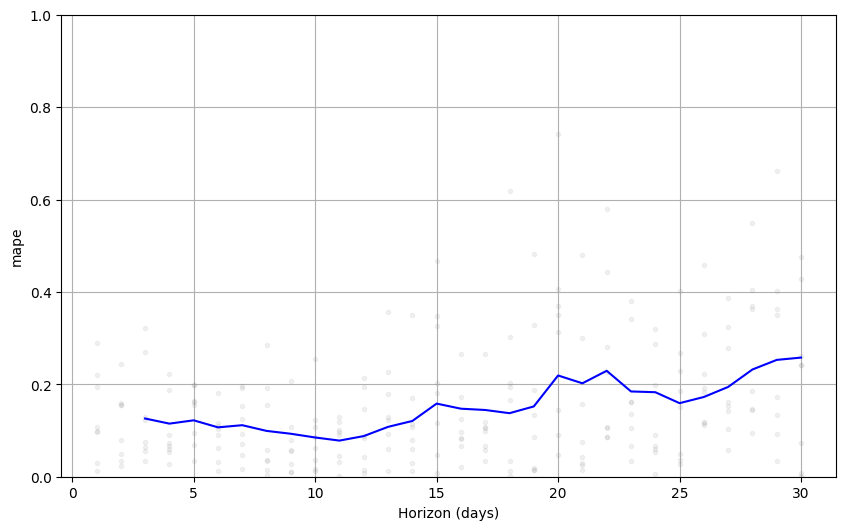

In [ ]:
# Supongamos que tienes el DataFrame df_p con los resultados de cross-validation

fig_cv2 = plot_cross_validation_metric(df_cv2, metric='mape')

# Ajustar el rango del eje y para que llegue hasta 100
plt.ylim(0, 1)

# Mostrar el gráfico
plt.show()

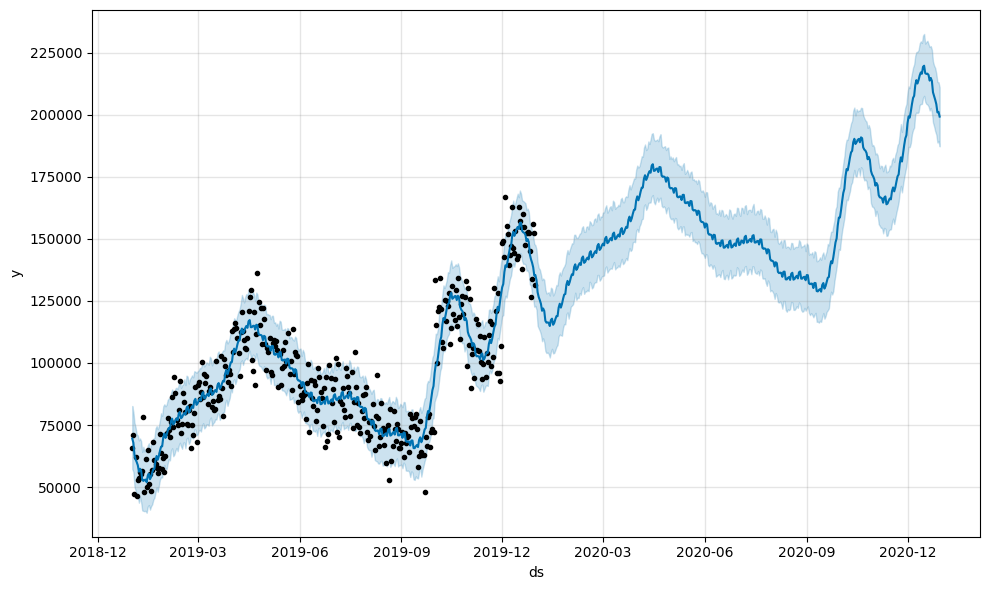

In [ ]:
future2 = model2.make_future_dataframe(periods=365)
fcst2 = model2.predict(future2)
fig2 = model2.plot(fcst2)

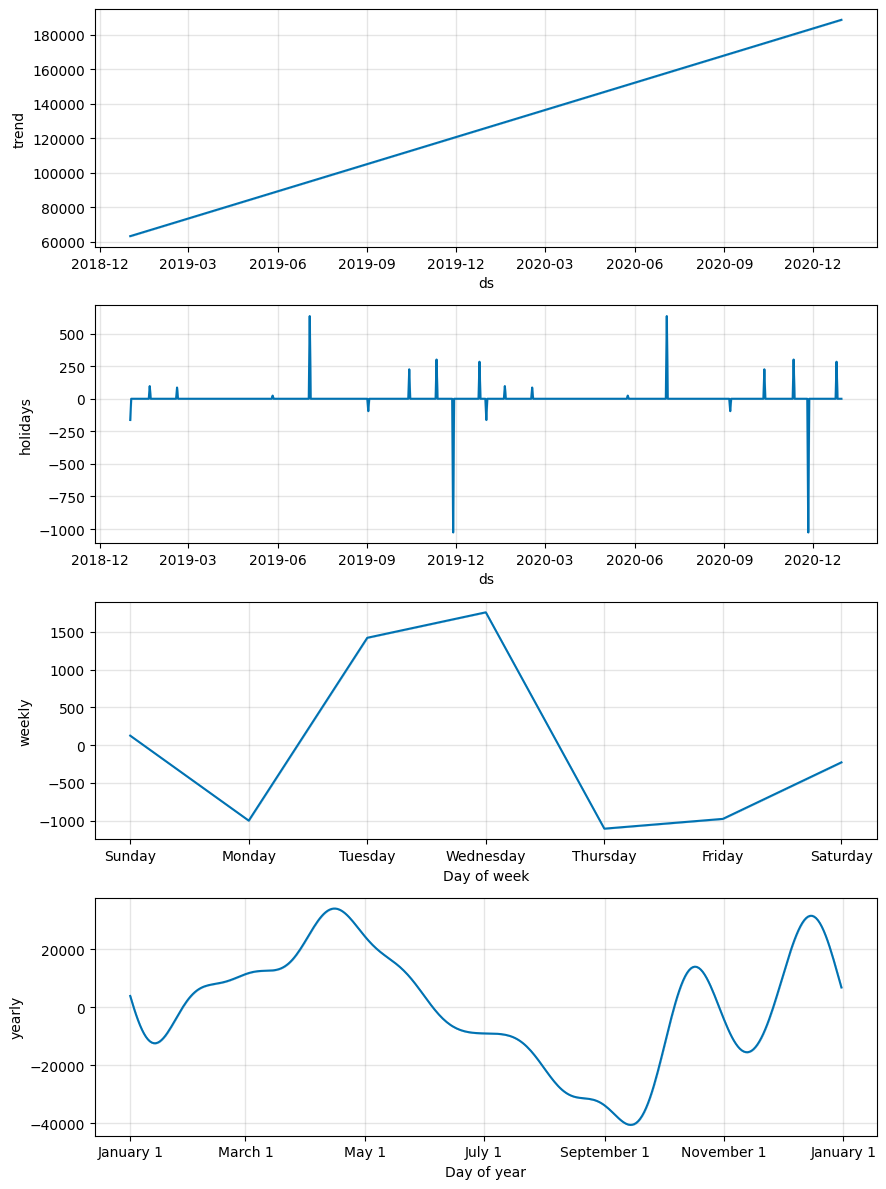

In [ ]:
fig_componentest2 = model2.plot_components(fcst2)

## 9- Comparación de modelos y elección

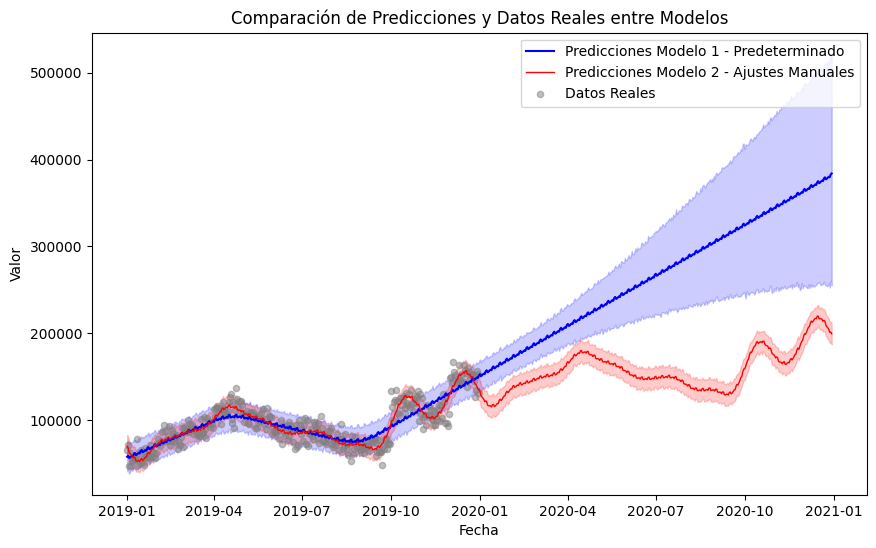

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que tienes dos modelos model1 y model2 y sus respectivas predicciones fcst1 y fcst2
# Supongamos también que tienes un DataFrame df con los datos reales

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las predicciones del modelo 1 con incertidumbre (área sombreada)
ax.plot(fcst1['ds'], fcst1['yhat'], color='blue', label='Predicciones Modelo 1 - Predeterminado')
ax.fill_between(fcst1['ds'], fcst1['yhat_lower'], fcst1['yhat_upper'], color='blue', alpha=0.2)

# Graficar las predicciones del modelo 2 con incertidumbre (área sombreada)
ax.plot(fcst2['ds'], fcst2['yhat'], color='red', label='Predicciones Modelo 2 - Ajustes Manuales', linewidth=1)
ax.fill_between(fcst2['ds'], fcst2['yhat_lower'], fcst2['yhat_upper'], color='red', alpha=0.2)

# Graficar los datos reales con puntos grises y más pequeños
ax.scatter(df['ds'], df['y'], color='gray', label='Datos Reales', s=20, alpha=0.5)

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Predicciones y Datos Reales entre Modelos')
plt.legend()
plt.show()
